In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("Sonar.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [37]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [38]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [39]:
# checking the null values

df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

In [40]:
#checking correlation matrix

df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
V1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
V2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
V3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
V4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
V5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
V58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
V59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
V60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055


In [41]:
#checking skewness

df.skew()


V1       2.131088
V2       2.155644
V3       2.652518
V4       3.401697
V5       2.018141
           ...   
V57      1.653090
V58      2.098330
V59      1.737506
V60      2.775754
Class    0.135903
Length: 61, dtype: float64

In [42]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [43]:
#checking the skewness again after treating

df.skew()

V1       2.036001
V2       1.969917
V3       2.344713
V4       2.818320
V5       1.698684
           ...   
V57      1.629182
V58      2.058207
V59      1.713349
V60      2.711412
Class    0.135903
Length: 61, dtype: float64

In [44]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195,1
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390,1
2,0.025863,0.056569,0.104270,0.102827,0.092944,0.205387,0.217608,0.319980,0.444558,0.482056,...,0.022935,0.016464,0.009455,0.017840,0.024107,0.031111,0.016267,0.009455,0.007770,1
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632,1
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578,0
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678,0
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095,0
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789,0


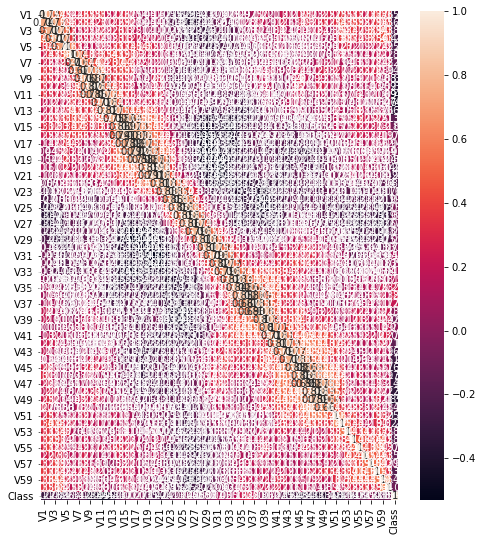

In [45]:
# heatmap
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

V1         AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
V2       AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
V3       AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
V4       AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
V5       AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
                               ...                        
V57           AxesSubplot(0.125,0.125;0.0824468x0.0803191)
V58        AxesSubplot(0.223936,0.125;0.0824468x0.0803191)
V59        AxesSubplot(0.322872,0.125;0.0824468x0.0803191)
V60        AxesSubplot(0.421809,0.125;0.0824468x0.0803191)
Class      AxesSubplot(0.520745,0.125;0.0824468x0.0803191)
Length: 61, dtype: object

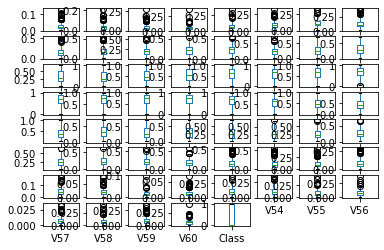

In [46]:
# checking outliers

df.plot.box(subplots=True,layout=(8,8))

In [47]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(208, 61)
(173, 61)


In [48]:
df=df_new
df.shape

(173, 61)

In [49]:
#spliting the data
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [50]:
# applying pca to minimise no. of columns to 10

pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [51]:
x.shape

(173, 10)

In [52]:
y.shape

(173,)

In [53]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.42090508,  0.61750883,  0.4793293 , ..., -0.86215895,
        -0.93286082,  2.16325557],
       [-1.20082152,  1.96270127, -1.5766097 , ..., -0.36383899,
        -0.06080282,  2.57627363],
       [ 0.75061682,  1.77915968,  0.53383649, ...,  0.66344856,
         1.40277748, -3.12001145],
       ...,
       [ 0.96261049, -1.40633732, -0.64325336, ..., -0.06695829,
         1.73424991,  0.5468063 ],
       [ 0.34447983, -1.34378667, -0.85311975, ..., -0.20048741,
         1.57992932, -0.56411944],
       [ 0.25725398, -1.30092595, -0.33522476, ...,  0.55598278,
         0.74969582, -0.77125255]])

In [54]:
# sending data to model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=37)

In [55]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 0.8717948717948718 at 62


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=62)

In [58]:
# testing other models too

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model=[GaussianNB(),SVC(),SVC(kernel='linear'),SVC(kernel='poly'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),DecisionTreeClassifier(criterion='entropy')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of GaussianNB() is:
0.7948717948717948
[[16  3]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.83      0.75      0.79        20

    accuracy                           0.79        39
   macro avg       0.80      0.80      0.79        39
weighted avg       0.80      0.79      0.79        39



Accuracy Score of SVC() is:
0.9487179487179487
[[18  1]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        20

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



Accuracy Score of SVC(kernel='linear') is:
0.8461538461538461
[[16  3]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1 

In [59]:
# applying some ensemble techniques too

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of RandomForestClassifier() is:
0.9487179487179487
[[17  2]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        20

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



Accuracy Score of AdaBoostClassifier() is:
0.8461538461538461
[[15  4]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.82      0.90      0.86        20

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.85        39
weighted avg       0.85      0.85      0.85        39



Accuracy Score of GradientBoostingClassifier() is:
0.8974358974358975
[[17  2]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.89      0.8

In [64]:
# from the above we can see the max accuracy at svc() and random forest classifier we hane choosen svc to proceed

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("accuracy score",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score 0.9487179487179487
[[18  1]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        20

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



In [65]:
#cross validation

from sklearn.model_selection import cross_val_score

svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.54285714 0.71428571 0.4        0.97058824 0.55882353]
0.6373109243697479 0.19411189922007965


In [66]:
# saving the SVC model

import joblib

joblib.dump(svc,'svcfile_Sonar_project2.obj') 


['svcfile_Sonar_project2.obj']